In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 
import glob as g

In [2]:
#creating the bias array 

bias_taken = sorted(g.glob('../kamen/Downloads/observational_astronomy/lab_1_data/CHJ_bias_images/*.fit'))
    #sorts the bias images
bias_correct = np.zeros([len(bias_taken), 3522, 4656])
    #array to put the corrected images into
bias_header = []

for i in range(len(bias_taken)):
    foo = fits.open(bias_taken[i]) #opening the images
    bias_correct[i,:,:] = foo[0].data / 16 + 1 #changing the images from 16 bit -> 12 bit
    bias_header.append(foo[0].header) #adding the header information to the array 
    foo.close() #closing the fits file since the data is extracted


In [3]:
#calculating the mean and median of the bias images 

bias_mean = np.mean(bias_correct, axis=0) #reducing random error, creating a 2Darray of the avg val of each pixel
bias_median = np.median(bias_mean) #the median of all the avg pixel vals 
print(f'Median of bias images(counts): {bias_median}')

Median of bias images(counts): 153.65


Text(0.5, 1.0, 'Mean Bias Image: QHY 163M CMOS')

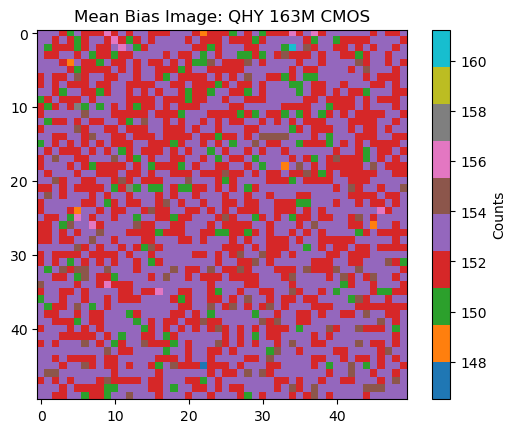

In [6]:
#plotting the avg bias image 

plt.imshow(bias_mean[0:50, 0:50], cmap='tab10')
plt.colorbar(label='Counts')
plt.title('Mean Bias Image: QHY 163M CMOS')

In [5]:
#creating the dark array, same process as before

darks_taken = sorted(g.glob('../kamen/Downloads/observational_astronomy/dark_images/*.fit'))
darks_correct = np.zeros([len(darks_taken), 3522, 4656])
darks_header = []

for i in range(len(darks_taken)):
    darks_foo = fits.open(darks_taken[i])
    darks_correct[i,:,:] = darks_foo[0].data / 16 + 1
    darks_header.append(darks_foo[0].header)
    darks_foo.close()
    

In [6]:
#calculating the mean and median, the same way as before but with the dark images

darks_mean = np.mean(darks_correct, axis=0)
darks_median = np.median(darks_mean)
print(f'Median of dark images(counts): {darks_median}')

Median of dark images(counts): 154.6


In [8]:
#loading the twilight flats 

twilight_taken = sorted(g.glob('../kamen/Downloads/observational_astronomy/twilight_images/*.fit'))
twilight_array = np.zeros([len(twilight_taken), 3522, 4656])
twilight_header = []


In [11]:
#normalizing the flats 

for i in range(len(twilight_taken)):
    twilight_foo = fits.open(twilight_taken[i])
    z_med = np.median(twilight_foo[0].data - bias_median)
    twilight_array[i,:,:] = ((twilight_foo[0].data / 16 + 1) - bias_mean) / z_med
    twilight_header.append(twilight_foo[0].header)
    twilight_foo.close()


In [13]:
#getting median normalized flat 

median_normalized_twilight = np.median(twilight_array, axis=0) 
    #reduses the noise by taking the median of each pixel in the normalized flats 

Text(0.5, 1.0, 'Median Normalized Twilight Flat Image: OHY 163M')

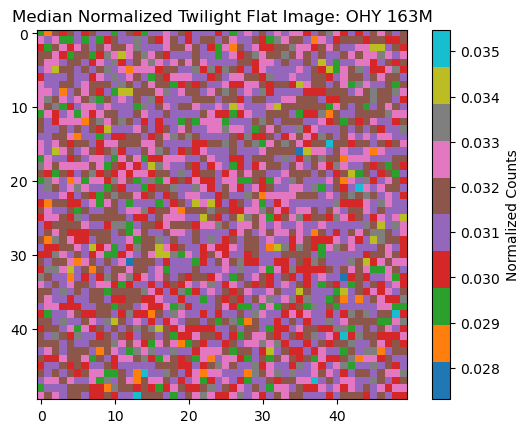

In [16]:
#plotting the normalized flat image 

plt.imshow(median_normalized_twilight[0:50, 0:50], cmap='tab10')
plt.colorbar(label='Normalized Counts')
plt.title('Median Normalized Twilight Flat Image: OHY 163M')

In [18]:
#finding the avg read noice 

diff_image = bias_correct[1] - bias_correct[0]
read_noise = image_diff / np.sqrt(2)
avg_read_noise = np.mean(read_noise)


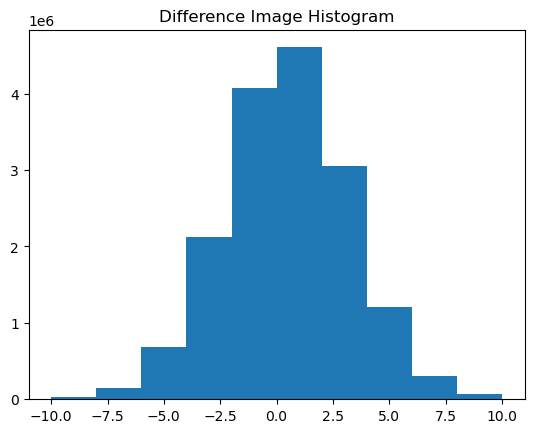

Average Read Noise: -0.0347362


In [21]:
#plotting the histogram of the differance image 

diff_image_flatten = diff_image.flatten()
plt.hist(diff_image_flatten, range=(-10,10))
plt.title('Difference Image Histogram')
plt.show()

print(f'Average Read Noise: {avg_read_noise:.7f}')

In [38]:
#importing science images

albireo = '../kamen/Downloads/observational_astronomy/science_images/alberio_1.fit'
altair = '../kamen/Downloads/observational_astronomy/science_images/Altair_4.fit'


Text(0.5, 1.0, 'Albireo: QHY 163M')

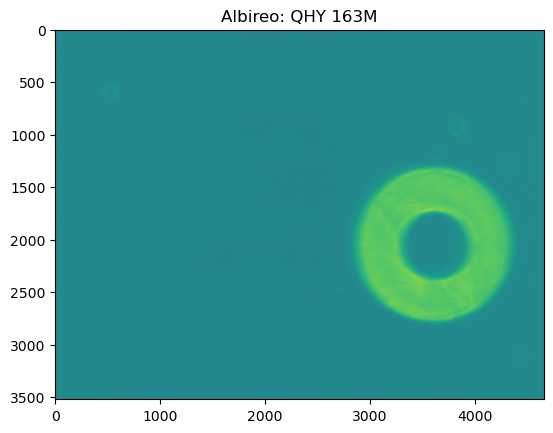

In [25]:
#albireo science image 

albi_foo = fits.open(albireo)
albi_data = albi_foo[0].data / 16 + 1
albi_header = albi_foo[0].header 
albi_calibrated_image = (albi_data - (darks_mean - bias_mean)) / median_normalized_twilight

plt.imshow(albi_calibrated_image)
plt.title('Albireo: QHY 163M')

Text(0.5, 1.0, 'Altair: QHY 163M')

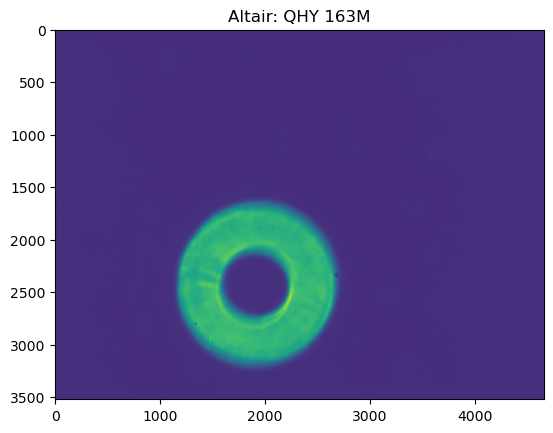

In [39]:
#Altair science image 

alt_foo = fits.open(altair)
alt_data = alt_foo[0].data /16 + 1
alt_header = alt_foo[0].header
alt_image = (alt_data - (darks_mean - bias_mean)) / median_normalized_twilight

plt.imshow(alt_image)
plt.title('Altair: QHY 163M')